In [18]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

from IPython.display import display

In [19]:
# ---------------------------------
# Code  Description
# ---------------------------------
# e	The value has been edited or estimated by USGS personnel.
# <	The Value is known to be less than reported value.
# >	The value is known to be greater than reported value.
# R	Records for these data have been revised.
# A	Approved for publication -- Processing and review completed.
# P	Provisional data subject to revision.

In [20]:
#Testing with percentiles
def twenty_per_less(num):
    
    print("20 percent less than ", num, "is" ,(num * 0.8))

def CCDF_baseflow(file_name):

    df = pd.read_csv(file_name+".csv")

    print("Baseflow Information: \n")
    
    august_data = df[df['month_nu'] == 8]

    average_august_value = august_data['mean_va'].mean()
    print("Avg Aug Val: ", average_august_value)

    per_fifty_average_august_value = august_data['p50_va'].mean()
    print("50% Avg Aug Val: ", per_fifty_average_august_value)

    twenty_per_less(average_august_value)
    twenty_per_less(per_fifty_average_august_value)


In [21]:
#Spring Storms Data (percentiles)
def CCDF_spring_storms(file_name):

    df = pd.read_csv(file_name+".csv")

    print("Spring Storms Information: \n")

    eighty_per = df.loc[(df['month_nu'] >= 4) & (df['month_nu'] <= 6) & (df['day_nu'] >= 15) & (df['day_nu'] <= 30), 'p80_va']
    twenty_per = df.loc[(df['month_nu'] >= 4) & (df['month_nu'] <= 6) & (df['day_nu'] >= 15) & (df['day_nu'] <= 30), 'p20_va']

    eighty_mean_vals = eighty_per.mean()
    twenty_mean_vals = twenty_per.mean()

    print(eighty_mean_vals)
    print(twenty_mean_vals)



In [28]:
#Testing with Average Daily Exceedance Flow Equation
def CCDF_aug_avg_daily_exceedance_flow(file_name):

    df = pd.read_csv(file_name + ".csv")
    
    #august_data = df[df['month_nu'] == 8]
    august_data = df[df['month_nu'] == 8].copy()

    #august_data['ranked_column_m'] = august_data['mean_va'].rank(ascending=False)

    ''' Might be my version of libraries but the commented out code below says 
    "Cannot set a DataFrame with multiple columns to the single column ranked_column_m"
    So I tried something else
    '''
    # august_data['ranked_column_m'] = august_data.sort_values('mean_va', ascending=False)
    # Sort the DataFrame based on 'mean_va' in descending order. This returns the whole data frame
    sorted_data = august_data.sort_values('mean_va', ascending=False)

    # Rank the values in the 'mean_va' column
    august_data['ranked_column_m'] = sorted_data['mean_va'].rank(method='first', ascending=False)


    df['numbered_col'] = range(1, len(df) + 1)

    #sort the values from highest to lowest
    #make a new column numbered from 1 to the end of the number or rows (m)
    #new column with the calculated P


    print("ranked column m:", august_data['ranked_column_m'].head())
    print("mean values: ", august_data['mean_va'].head())
    print("????", august_data['mean_va'].rank(ascending=False))

    
    #august_data.loc[:, 'ranked_column_m'] = august_data['mean_va'].rank(ascending=False)
    #df['ranked_column_m'] = df['mean_va'].rank(ascending=False)
    
    n = len(august_data)

    """ 
    do you still need this?? or it's old
    """
    df['P_Value'] = range(1, len(df) + 1)

    P = 0
    ''' this also didn't work for me because n is an interger not an array'''
    """ for i in n:
        m = august_data.iloc[i]['ranked_column_m']
        #august_data['ranked_column_m'] = august_data['mean_va']
        P = 100 * (m / (n + 1))
        df.at[i, 'P_Value'] = P
        #print(df['P_Value'])
      """  
    august_data['P_Value'] = (august_data['ranked_column_m'] / (n + 1)) * 100
    print(august_data['P_Value'])
    return(august_data)

In [23]:
#Testing with Average Daily Exceedance Flow Equation
def CCDF_spring_flow_avg_daily_exceedance_flow(file_name):

    df = pd.read_csv(file_name + ".csv")

    spring_data = df.loc[(df['month_nu'] >= 4) & (df['month_nu'] <= 6) & (df['day_nu'] >= 15) & (df['day_nu'] <= 30), 'mean_va']

    spring_data['ranked_column_m'] = spring_data['mean_va'].rank(ascending=False)
    
    #august_data.loc[:, 'ranked_column_m'] = august_data['mean_va'].rank(ascending=False)
    #df['ranked_column_m'] = df['mean_va'].rank(ascending=False)
    
    n = len(spring_data)

    P = 0

    for i in range(n):
        m = spring_data.iloc[i]['ranked_column_m']
        P += 100 * (m / (n + 1))
    
    print (P)

In [35]:
''' Made this a variable so it's nicer using later. And You can just change one line when switching sites'''
file_name = 'wallstreet_data'
CCDF_baseflow(file_name)
CCDF_spring_storms(file_name)

Aug_data = CCDF_aug_avg_daily_exceedance_flow(file_name)
#CCDF_spring_flow_avg_daily_exceedance_flow(file_name)

Baseflow Information: 

Avg Aug Val:  310.258064516129
50% Avg Aug Val:  267.61290322580646
20 percent less than  310.258064516129 is 248.20645161290324
20 percent less than  267.61290322580646 is 214.0903225806452
Spring Storms Information: 

1468.0
379.3333333333333
ranked column m: 213     8.0
214    12.0
215    10.0
216    13.0
217    15.0
Name: ranked_column_m, dtype: float64
mean values:  213    343
214    322
215    333
216    313
217    310
Name: mean_va, dtype: int64
???? 213     8.5
214    12.0
215    10.0
216    13.5
217    15.0
218    18.5
219    21.0
220    17.0
221     2.0
222     1.0
223     3.0
224     4.0
225     5.0
226     6.0
227     7.0
228     8.5
229    11.0
230    13.5
231    16.0
232    18.5
233    20.0
234    22.0
235    23.0
236    24.0
237    31.0
238    29.0
239    26.0
240    27.0
241    25.0
242    28.0
243    30.0
Name: mean_va, dtype: float64
213    25.000
214    37.500
215    31.250
216    40.625
217    46.875
218    59.375
219    65.625
220    53.125


In [25]:
#Plotting CCDF
def CCDF_plot(file_name, x, y):

    df = pd.read_csv(file_name + ".csv")

    fig, ax = plt.subplots(figsize=(16, 6))
    ax.plot(df[x], df[y], marker='o', linestyle='-')
    #plot scatter
    plt.title('CCDF of ' + file_name)
    plt.xlabel('Flow Duration Interval (or) Exceedance Probability (%)') #P value
    plt.ylabel('Mean Daily Flow (cfs)')
    plt.grid(True)

    return plt.show()

In [31]:
Aug_data.keys()

Index(['agency_cd', 'site_no', 'parameter_cd', 'ts_id', 'month_nu', 'day_nu',
       'begin_yr', 'end_yr', 'count_nu', 'max_va_yr', 'max_va', 'min_va_yr',
       'min_va', 'mean_va', 'p05_va', 'p10_va', 'p20_va', 'p25_va', 'p50_va',
       'p75_va', 'p80_va', 'p90_va', 'p95_va', 'ranked_column_m', 'P_Value'],
      dtype='object')

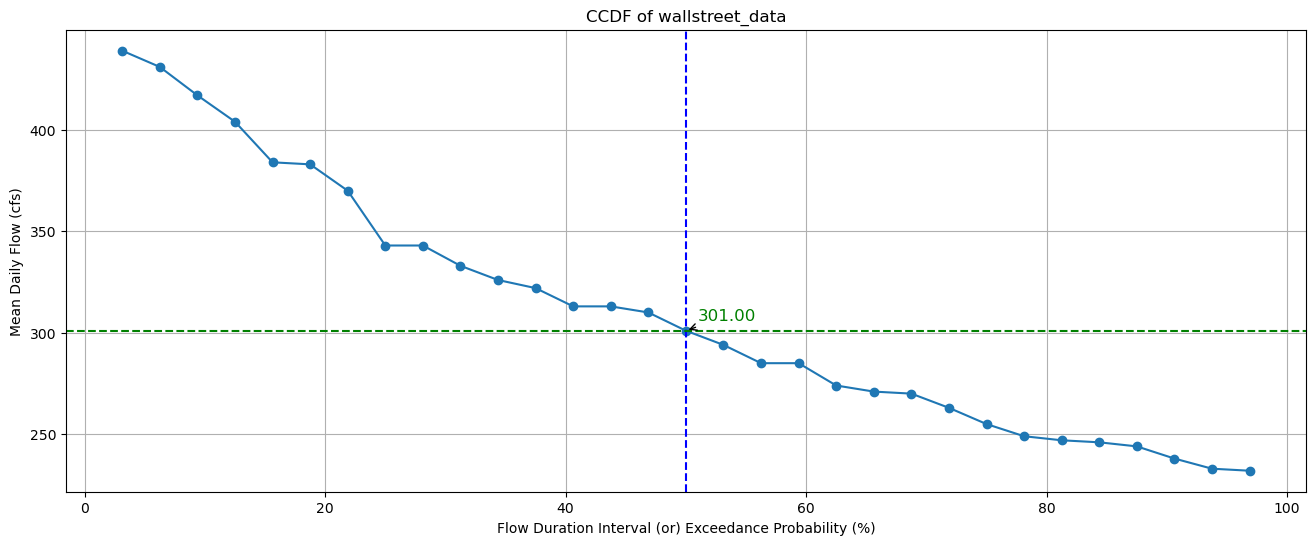

In [43]:
''' I didn't see where you saved the data frame to a file to then use to read so I made the code as not a function'''

df = Aug_data
df_sorted = df.sort_values(by='P_Value')
x = 'P_Value'
y = 'mean_va'

fig, ax = plt.subplots(figsize=(16, 6))
ax.plot(df_sorted[x], df_sorted[y], marker='o', linestyle='-')


# Interpolate the y-value where P_Value = 50
p_value_50 = 50
if p_value_50 in df_sorted[x].values:
    intersection_y = df_sorted[df_sorted[x] == p_value_50][y].values[0]
else:
    intersection_y = np.interp(p_value_50, df_sorted[x], df_sorted[y])

# Plot vertical line at P_Value = 50
ax.axvline(x=p_value_50, color='blue', linestyle='--')

# Add a horizontal line at the intersection point
ax.axhline(y=intersection_y, color='green', linestyle='--')

# Annotate the intersection point
ax.annotate(f'{intersection_y:.2f}', xy=(p_value_50, intersection_y), xytext=(p_value_50 + 1, intersection_y + 5),
            arrowprops=dict(facecolor='black', arrowstyle='->'), fontsize=12, color='green')

# Add scatter plot for individual points
# ax.scatter(df_sorted[x], df_sorted[y], color='red')
#plot scatter
plt.title('CCDF of ' + file_name)
plt.xlabel('Flow Duration Interval (or) Exceedance Probability (%)') #P value
plt.ylabel('Mean Daily Flow (cfs)')
plt.grid(True)

In [ ]:
'''
For Wallstreet:
Baseflow 
Baseflow is 272 cfs (50% August average daily exceedance flow) 
Year round, keep flow above 218 cfs (20% less than baseflow).

Spring flows (April 15-June 30): low flows are 307 cfs (90% average daily exceedance flow) and high 
flows are 1665 (10% average daily exceedance flow

filling of impoundments, water should be kept above 500 cfs (~70% exceedance flow).
 '''